In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';',encoding='latin-1')
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [ ]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [3]:
df.loc[:, 'TP_LINGUA'].value_counts()

,count
TP_LINGUA,
0,190148
1,179315


([<matplotlib.patches.Wedge at 0x791eb909f590>,
 [Text(-0.050645063988250937, 1.0988335076314457, ''),
  Text(0.05064506398825031, -1.0988335076314457, '')],
 [Text(-0.02762458035722778, 0.599363731435334, '51.5%'),
  Text(0.02762458035722744, -0.599363731435334, '48.5%')])

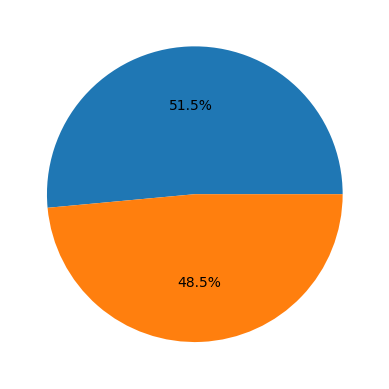

In [4]:
plt.pie(df.loc[:, 'TP_LINGUA'].value_counts(), autopct='%1.1f%%')

In [5]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

Criando um df com as colunas desejadas

In [6]:
dfp = df.loc[:, ['TP_LINGUA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_FAIXA_ETARIA', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ESCOLA',]].copy()
dfp.head()

,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
0,0,NaN,NaN,NaN,NaN,NaN,14,M,2,1,1,1
1,0,NaN,NaN,NaN,NaN,NaN,12,M,2,1,0,1
2,1,502.0,498.9,475.6,363.2,700.0,6,F,1,1,1,1
3,0,459.0,508.5,507.2,466.7,880.0,2,F,1,3,1,2
4,0,402.5,379.2,446.9,338.3,560.0,3,F,1,3,1,2


In [7]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369463 entries, 0 to 369462
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TP_LINGUA         369463 non-null  int64  
 1   NU_NOTA_CN        275520 non-null  float64
 2   NU_NOTA_CH        286852 non-null  float64
 3   NU_NOTA_LC        286852 non-null  float64
 4   NU_NOTA_MT        275520 non-null  float64
 5   NU_NOTA_REDACAO   286851 non-null  float64
 6   TP_FAIXA_ETARIA   369463 non-null  int64  
 7   TP_SEXO           369463 non-null  object 
 8   TP_ESTADO_CIVIL   369463 non-null  int64  
 9   TP_COR_RACA       369463 non-null  int64  
 10  TP_NACIONALIDADE  369463 non-null  int64  
 11  TP_ESCOLA         369463 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 33.8+ MB


Renomeando as respostas de certas colunas para facilitar o entendimento

In [10]:
dicionario = {'TP_LINGUA': {0: 'INGLES', 1: 'ESPANHOL'},
             'TP_ESTADO_CIVIL': {0: 'Não informado', 1: 'Solteiro(a)', 2: 'Casado(a)', 3: 'Divorciado(a)', 4:'Viúvo(a)'},
             'TP_COR_RACA': {0: 'N/I', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'},
             'TP_NACIONALIDADE' : {0: 'N/I', 1: 'Brasileira', 2: 'Brasileira naturalizada', 3: 'Estrangeira', 4: 'Brasileira nata, nascida ext'},
             'TP_ESCOLA': {1: 'Não respondeu', 2: 'Pública', 3: 'Privada'}
             }

dfp.replace(dicionario, inplace=True)
dfp.head()

,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
0,INGLES,NaN,NaN,NaN,NaN,NaN,14,M,Casado(a),Branca,Brasileira,Não respondeu
1,INGLES,NaN,NaN,NaN,NaN,NaN,12,M,Casado(a),Branca,N/I,Não respondeu
2,ESPANHOL,502.0,498.9,475.6,363.2,700.0,6,F,Solteiro(a),Branca,Brasileira,Não respondeu
3,INGLES,459.0,508.5,507.2,466.7,880.0,2,F,Solteiro(a),Parda,Brasileira,Pública
4,INGLES,402.5,379.2,446.9,338.3,560.0,3,F,Solteiro(a),Parda,Brasileira,Pública


Obtendo uma descrição estatistica geral do df

In [23]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'] # colunas que serão analisadas
operacoes = ['describe'] # operações realizadas
aggregation_dict = {col: operacoes for col in notas} # aplicando as operações em cada coluna
dfp.groupby('TP_LINGUA').agg(aggregation_dict) #realizando a analise

NU_NOTA_CN                                                          \
            describe                                                           
               count        mean        std  min    25%    50%    75%    max   
TP_LINGUA                                                                      
ESPANHOL    127405.0  471.726922  77.242322  0.0  424.5  468.1  518.2  820.1   
INGLES      148115.0  506.782175  87.305452  0.0  450.4  504.8  560.7  868.4   

          NU_NOTA_CH                                                          \
            describe                                                           
               count        mean        std  min    25%    50%    75%    max   
TP_LINGUA                                                                      
ESPANHOL    133400.0  502.663325  81.126951  0.0  451.2  507.6  557.6  823.0   
INGLES      153452.0  541.947243  84.932885  0.0  490.9  549.1  600.1  823.0   

          NU_NOTA_LC                                                          \
            describe                                                           
               count        mean        std  min    25%    50%    75%    max   
TP_LINGUA                                                                      
ESPANHOL    133400.0  499.596274  68.987025  0.0  457.2  503.2  546.2  751.8   
INGLES      153452.0  533.676325  72.897850  0.0  489.4  538.6  583.9  768.9   

          NU_NOTA_MT                                                           \
            describe                                                            
               count        mean         std  min    25%    50%    75%    max   
TP_LINGUA                                                                       
ESPANHOL    127405.0  490.576132  112.477510  0.0  407.0  474.4  562.6  958.6   
INGLES      148115.0  552.066301  131.250118  0.0  450.4  546.6  648.9  958.6   

          NU_NOTA_REDACAO                                                    \
                 describe                                                     
                    count        mean         std  min    25%    50%    75%   
TP_LINGUA                                                                     
ESPANHOL         133400.0  608.008846  211.440803  0.0  500.0  600.0  760.0   
INGLES           153451.0  671.885618  202.942761  0.0  560.0  680.0  840.0   

                   
                   
              max  
TP_LINGUA          
ESPANHOL   1000.0  
INGLES     1000.0

Obtendo a nota máxima de cada grupo de nacionalidade de cada lingua

In [25]:
operacoes = ['max']
aggregation_dict = {col: operacoes for col in ['NU_NOTA_LC']}
dfp.groupby(['TP_LINGUA', 'TP_NACIONALIDADE']).agg(aggregation_dict)



NU_NOTA_LC
                                              max
TP_LINGUA TP_NACIONALIDADE                       
ESPANHOL  Brasileira                        751.8
          Brasileira nata, nascida ext      704.0
          Brasileira naturalizada           668.6
          Estrangeira                       700.9
          N/I                               609.7
INGLES    Brasileira                        768.9
          Brasileira nata, nascida ext      748.4
          Brasileira naturalizada           734.0
          Estrangeira                       668.2
          N/I                               666.8

Obtendo as informações gerais dos estudantes com a maior nota na área de linguagens de cada lingua

In [57]:
#max esp = 751.8          max ing = 768.9

dfp.loc[(dfp['NU_NOTA_LC'] == 751.8) | (dfp['NU_NOTA_LC'] == 768.9)].drop(columns=notas)

,TP_LINGUA,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA
30803,ESPANHOL,3,M,Solteiro(a),Branca,Brasileira,Não respondeu
142949,INGLES,2,M,Solteiro(a),Parda,Brasileira,Privada


In [62]:
operacoes = ['mean']
aggregation_dict = {col: operacoes for col in ['NU_NOTA_LC']}
dfp.groupby(['TP_LINGUA', 'TP_NACIONALIDADE']).agg(aggregation_dict).sort_values(by=('NU_NOTA_LC', 'mean'), ascending=False)

NU_NOTA_LC
                                              mean
TP_LINGUA TP_NACIONALIDADE                        
INGLES    Brasileira nata, nascida ext  544.665846
          Brasileira                    534.330525
          Estrangeira                   515.387903
ESPANHOL  Estrangeira                   501.119273
          Brasileira                    500.147467
INGLES    Brasileira naturalizada       497.596849
ESPANHOL  Brasileira nata, nascida ext  495.822543
          Brasileira naturalizada       478.956705
INGLES    N/I                           466.067647
ESPANHOL  N/I                           450.303750

In [66]:
dfp.groupby('TP_SEXO')['TP_LINGUA'].value_counts(normalize=True)

TP_SEXO  TP_LINGUA
F        ESPANHOL     0.507629
         INGLES       0.492371
M        INGLES       0.565450
         ESPANHOL     0.434550
Name: proportion, dtype: float64

In [67]:
dfp.groupby('TP_LINGUA')['TP_SEXO'].value_counts(normalize=True)

TP_LINGUA  TP_SEXO
ESPANHOL   F          0.726911
           M          0.273089
INGLES     F          0.664893
           M          0.335107
Name: proportion, dtype: float64

**MAIS MULHERES FAZEM A PROVA. HOMENS TENDEM A OPTAR MAIS POR INGLÊS.**

In [69]:
dfp.groupby('TP_ESCOLA')['TP_LINGUA'].value_counts(normalize=True)


TP_ESCOLA      TP_LINGUA
Não respondeu  ESPANHOL     0.510382
               INGLES       0.489618
Privada        INGLES       0.793377
               ESPANHOL     0.206623
Pública        INGLES       0.524669
               ESPANHOL     0.475331
Name: proportion, dtype: float64

In [70]:
dfp.groupby('TP_LINGUA')['TP_ESCOLA'].value_counts(normalize=True)

TP_LINGUA  TP_ESCOLA    
ESPANHOL   Não respondeu    0.633031
           Pública          0.349396
           Privada          0.017572
INGLES     Não respondeu    0.572680
           Pública          0.363690
           Privada          0.063629
Name: proportion, dtype: float64


*   **ESTUDANTES DE ESCOLA PRIVADA PREFEREM MAJORITARIAMENTE FAZER A PROVA EM INGLÊS**
*   **ESTUDANTES DE ESCOLA PÚBLICA NÃO TEM UMA PREFERENCIA MAJORITÁRIA**
*   **ESTUDANTES DE ESCOLA PRIVADA SÃO UMA MINORIA DO TODO**



In [64]:
dfp.groupby(['TP_LINGUA', 'TP_SEXO']).agg(aggregation_dict).sort_values(by=('NU_NOTA_LC', 'mean'), ascending=False)

NU_NOTA_LC
                         mean
TP_LINGUA TP_SEXO            
INGLES    M        534.857426
          F        533.086340
ESPANHOL  F        501.107193
          M        495.526536

# ------------------------- RESTO ----------------------

In [12]:
x = dfp['TP_LINGUA'].unique()
x

array(['INGLES', 'ESPANHOL'], dtype=object)

([<matplotlib.patches.Wedge at 0x7ae7d1d4e210>,
 [Text(1.0999998432460816, 0.0005872466229995347, 'TP_LINGUA'),
  Text(0.9199964855856348, 0.6029978992584311, 'NU_NOTA_CN'),
  Text(-0.21839833552748, 1.0781011858999259, 'NU_NOTA_CH'),
  Text(-1.0869344663856435, 0.1690368769912545, 'NU_NOTA_LC'),
  Text(-0.5236867112190013, -0.9673428701823498, 'NU_NOTA_MT'),
  Text(0.825759343475663, -0.7267196891942876, 'NU_NOTA_REDACAO')],
 [Text(0.5999999144978626, 0.000320316339817928, '0.0%'),
  Text(0.5018162648648916, 0.3289079450500533, '18.4%'),
  Text(-0.11912636483317089, 0.5880551923090505, '19.5%'),
  Text(-0.59287334530126, 0.09220193290432062, '19.3%'),
  Text(-0.2856472970285462, -0.5276415655540089, '19.9%'),
  Text(0.4504141873503616, -0.39639255774233867, '23.0%')])

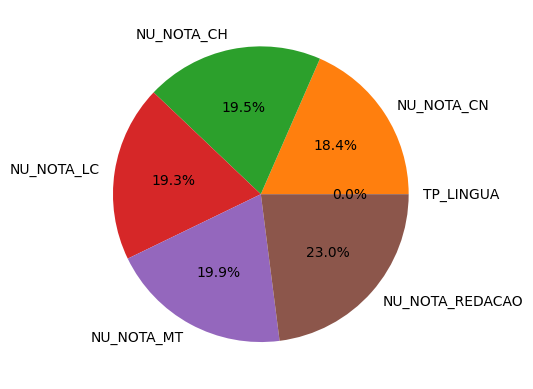

In [ ]:
plt.pie(dfp.mean(), labels = dfp.columns, autopct='%1.1f%%')

In [ ]:
dfp.groupby('TP_LINGUA').mean().head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_LINGUA,,,,,
0,513.030993,542.387862,534.904911,565.311473,651.281370
1,472.126877,497.619946,495.488784,490.801638,572.528283


TypeError: only length-1 arrays can be converted to Python scalars

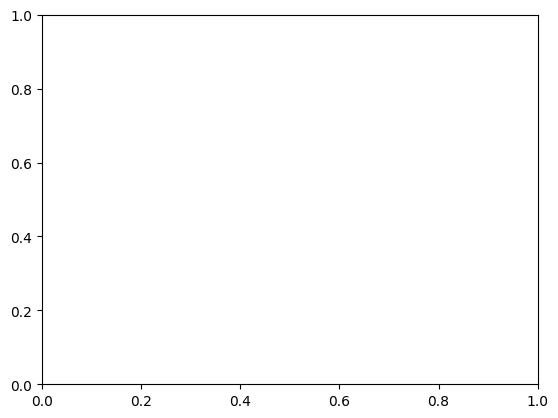

In [ ]:
plt.bar(x, dfp.groupby('TP_LINGUA')[['NU_NOTA_MT', 'NU_NOTA_LC']].mean())

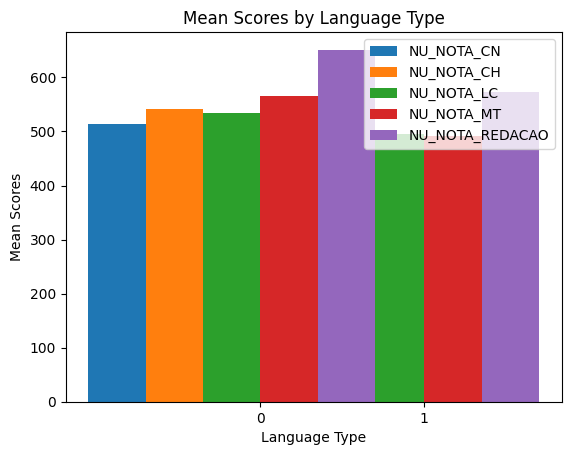

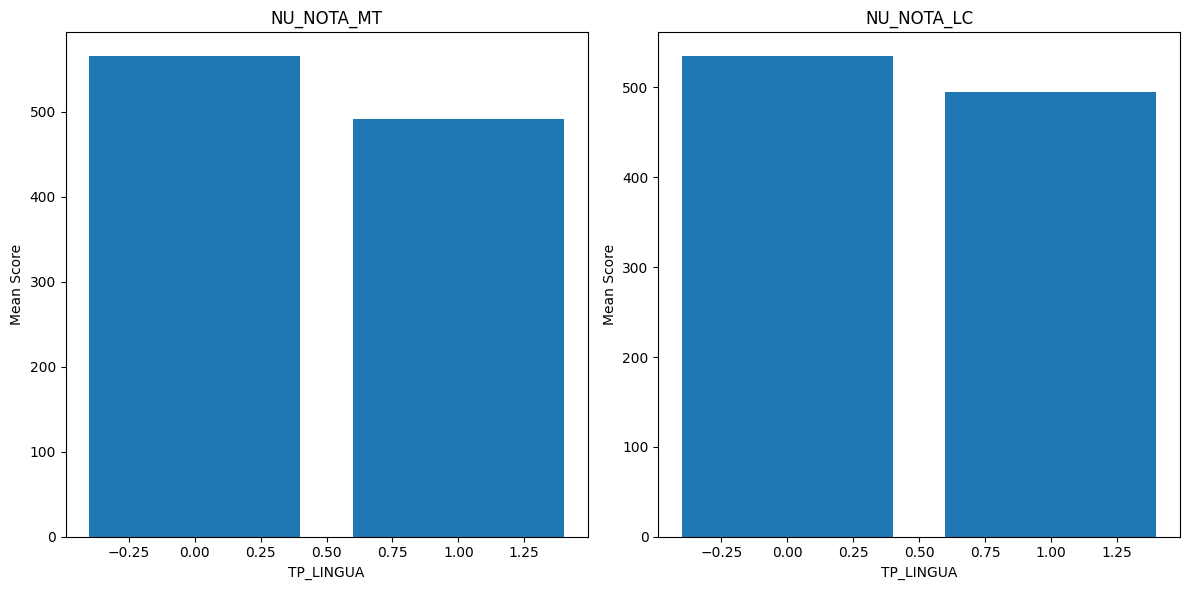

In [ ]:
# Assuming 'dfp', 'x' are defined as in your code

# Calculate the means for each subject
mt_means = dfp.groupby('TP_LINGUA')['NU_NOTA_MT'].mean()
lc_means = dfp.groupby('TP_LINGUA')['NU_NOTA_LC'].mean()

# Get unique values for 'TP_LINGUA'
x = dfp['TP_LINGUA'].unique()

# Create a figure and axes with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot for 'NU_NOTA_MT'
axes[0].bar(x, mt_means)
axes[0].set_title('NU_NOTA_MT')
axes[0].set_xlabel('TP_LINGUA')
axes[0].set_ylabel('Mean Score')

# Plot for 'NU_NOTA_LC'
axes[1].bar(x, lc_means)
axes[1].set_title('NU_NOTA_LC')
axes[1].set_xlabel('TP_LINGUA')
axes[1].set_ylabel('Mean Score')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

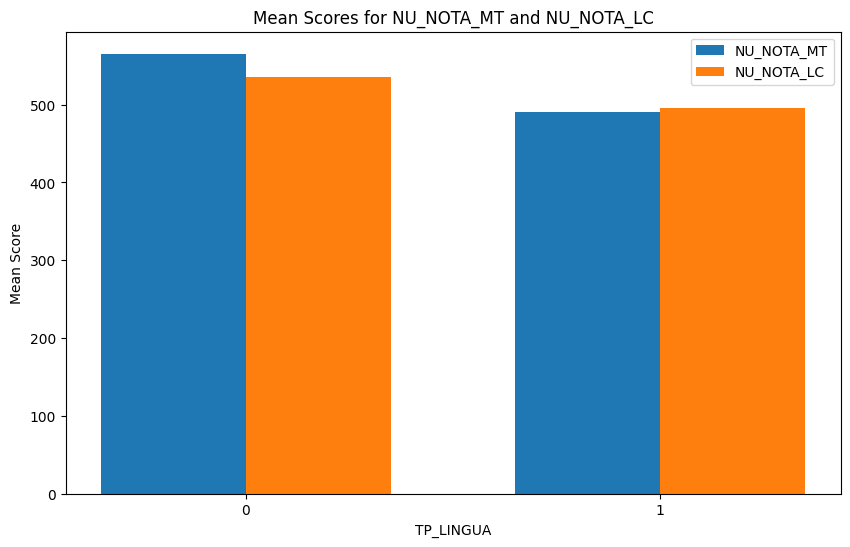

In [ ]:
# Assuming 'dfp', 'x' are defined as in your code

# Calculate the means for each subject
mt_means = dfp.groupby('TP_LINGUA')['NU_NOTA_MT'].mean()
lc_means = dfp.groupby('TP_LINGUA')['NU_NOTA_LC'].mean()

# Get unique values for 'TP_LINGUA'
x = dfp['TP_LINGUA'].unique()

# Define bar width
width = 0.35

# Calculate positions for the bars
x_pos_mt = np.arange(len(x))
x_pos_lc = x_pos_mt + width

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6)) # Ajuste o figsize conforme necessário

ax.bar(x_pos_mt, mt_means, width, label='NU_NOTA_MT')
ax.bar(x_pos_lc, lc_means, width, label='NU_NOTA_LC')

# Customize the plot
ax.set_xticks(x_pos_mt + width / 2) # Define as posições dos ticks no eixo x
ax.set_xticklabels(x) # Define os rótulos dos ticks no eixo x
ax.set_xlabel('TP_LINGUA')
ax.set_ylabel('Mean Score')
ax.set_title('Mean Scores for NU_NOTA_MT and NU_NOTA_LC')
ax.legend() # Adiciona uma legenda

plt.show()

<BarContainer object of 2 artists>

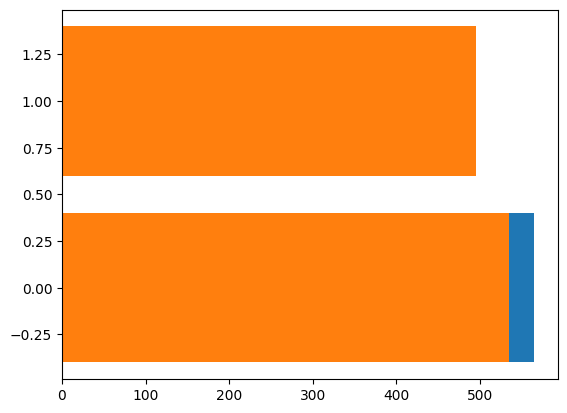

In [ ]:
plt.barh(x, dfp.groupby('TP_LINGUA')['NU_NOTA_MT'].mean())
plt.barh(x, dfp.groupby('TP_LINGUA')['NU_NOTA_LC'].mean())